# 시계열 데이터 사례 분석

잘 알려진 작은 시계열 데이터를 토대로 시계열 데이터의 안정성 기념을 시각적으로 따져봅시다.

데이터는 `./data` 폴더에 저장되어 있습니다.

- [멜버른의 기온 데이터](#Time-Series-생성)
- [월별 항공승객 수 데이터](#다른-데이터에-대해서도-비교해보자.-\--월별-항공승객-수-데이터)


## Time Series 생성

첫 번째로 다루어볼 데이터는 `Daily Minimum Temperatures in Melbourne` 입니다. 온도 변화를 다루는 시계열인 만큼 안정성이 있지 않을까요?

In [1]:
# 필요한 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
dataset_path = os.path.dirname(os.path.abspath('__file__'))
df = pd.read_csv(dataset_path + r'/data/daily-min-temperatures.csv')
print(df.shape)
df.head(10)

(3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


Pandas에서 제공하는 Series 자료구조가 있습니다. 오늘 다루게 될 시계열 (Time Series)도 결국 시간 칼럼을 인덱스로 하는 Series로 표현됩니다. 우리가 읽어들인 뎅티ㅓ 파일은 2개의 칼럼을 가진 DataFrame으로 변환되었습니다.

위의 DataFrame에서 Date 칼럼을 인덱스로 삼아 Time Series를 생성해봅시다.

In [5]:
dataset_path += r'/data/daily-min-temperatures.csv'
df = pd.read_csv(dataset_path, index_col = 'Date', parse_dates=True)
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


시간 컬럼이 index가 되었지만 아직도 type은 DataFrame으로 나옵니다. 우리가 찾는 Time Series는 바로 여기 있습니다.

In [6]:
ts1 = df['Temp']
print(type(ts1))
ts1.head(10)

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
Name: Temp, dtype: float64

DataFrame인 df와 Series인 df\['Temp'\]는 인덱스 구조가 동일하므로 Numpy, Pandas, Matplotlib 등 많은 라이브러리들이 호환해서 지원해 줍니다. 하지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행하도록 하겠습니다.

## 시계열 안정성의 정성적 분석

이제 Time Seires가 준비되었습니다. 시각화를 통해 **안정성(Stationary)** 여부를 확인해봅시다.

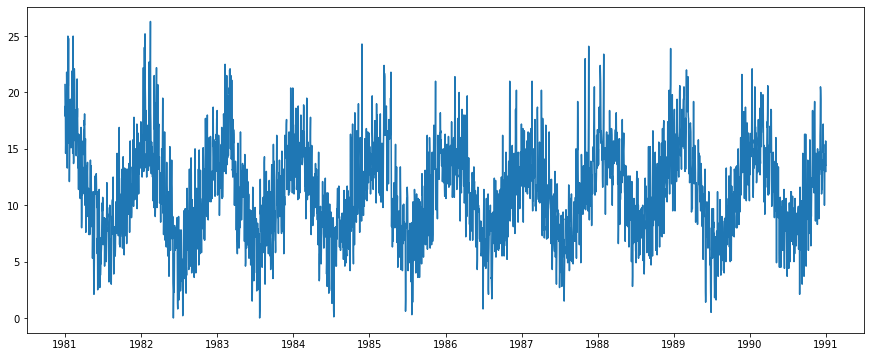

In [7]:
from matplotlib.pyplot import rcParams

# matlab 차트의 기본 크기를 15, 6으로 지정해줍니다.
rcParams['figure.figsize'] = 15, 6 

# time series 데이터를 차트로 그려줍니다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

좋습니다. 멋진 차트가 그려졌군요.

하지만 분석에 들어가기 전에 잊지 말아야 할 단계가 하나 있습니다. 바로 결측치 유무 확인입니다.

In [9]:
ts1[ts1.isna()]

Series([], Name: Temp, dtype: float64)

어떻습니까? 다행히 이 데이터에는 결측치가 없군요. 하지만 혹시 결측치가 있다면 조치가 필요합니다. NaN이 들어있는 데이터는 통계분석시에 많은 오류를 일으킬 뿐더러 분석결과에도 악영향을 미칠 것입니다.

만약 결측치가 있다면, 

- 1) 결측치가 있는 데이터를 모두 삭제(drop)하거나, 
- 2) 결측치 양 옆의 값들을 이용해서 적절히 보간(interpolate) 대입

하는 방법이 있습니다. 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식인 거죠. 이번 경우라면 시간을 인덱스로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택하겠습니다.

Pandas에서 결측치 보간을 처리하는 메소드는 다음과 같습니다. 상세한 설명은 이 [아티클](https://rfriend.tistory.com/264)을 참고해 주세요.


In [10]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')
ts1[ts1.isna()]    # 다시 NaN 확인

Series([], Name: Temp, dtype: float64)

어떻습니까? 이전 스텝에서 보았던 시간 추이에 따라 일정한 평균, 분산, 자기공분산의 패턴이 나타나는 것 같습니까? 직관적으로 그래 보이긴 합니다만, 시계열 데이터의 통계적 특성을 좀더 명료하게 시각화해 보겠습니다.

아래는 일정 시간내 *구간 통계치(Rolling Statistics)* 를 시각화해 보는 함수입니다. 현재 타임스텝부터 `window`에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀더 뚜렷한 경향성을 확인할 수 있을 것입니다.



In [13]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean() # 이동 평균 시계열
    rolstd = timeseries.rolling(window=window).std() # 이동 표준편차 시계열
    
    # 원본 시계열, 이동평균, 이동표준편차를 plot으로 시각화해봅시다.
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Derivatioin")
    plt.show(block = False)

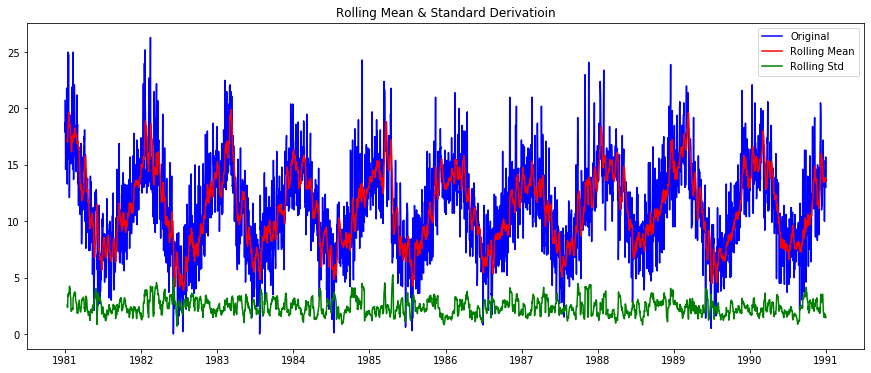

In [14]:
plot_rolling_statistics(ts1, window=12)

이 시계열 데이터가 안정적이라고 명확하게 결론을 내릴 수 있을까요? 시각화 해보면 그렇다는 느낌은 들지만 명확하게 그렇다고 결론을 내릴 수 있을지는 잘 모르겠습니다. 좀 다른 패턴의 시계열 데이터와 비교해 보면 어떨까요?


# 다른 데이터에 대해서도 비교해보자. - 월별 항공승객 수 데이터


이번에는 `International airline passengers` 데이터셋입니다. 월별 항공승객 수(천명단위)의 시계열 데이터인데 기온 변화 데이터셋과는 조금 다른 패턴이나타날 것 같습니다!


In [16]:
dataset_path = os.path.dirname(os.path.abspath('__file__'))
dataset_path += r'/data/airline-passengers.csv'
df = pd.read_csv(dataset_path, parse_dates=True, index_col = 'Month').fillna(0)

In [17]:
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


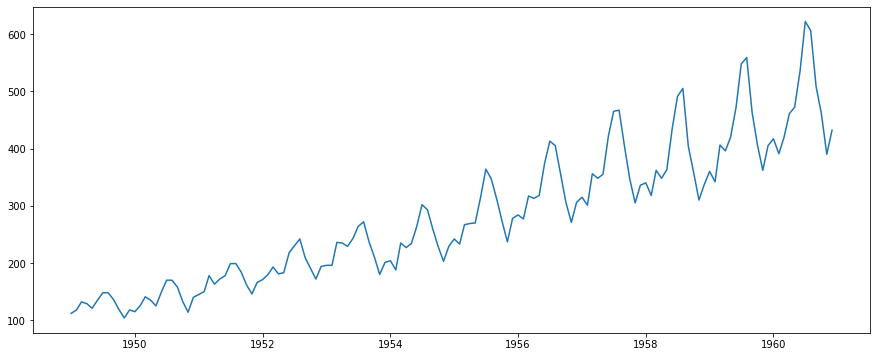

In [18]:
ts2 = df['Passengers']
plt.plot(ts2)